In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.datasets import fetch_california_housing

In [3]:
data=fetch_california_housing()

In [4]:
df=pd.DataFrame(data.data,columns=data.feature_names)

In [7]:
df['MedHouseVal']=data.target

In [8]:
print("\nDataset Information")
df.info


Dataset Information


<bound method DataFrame.info of        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       

In [9]:
print("\n summary statics of the dataset")
print(df.describe())


 summary statics of the dataset
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  

<Figure size 864x576 with 0 Axes>

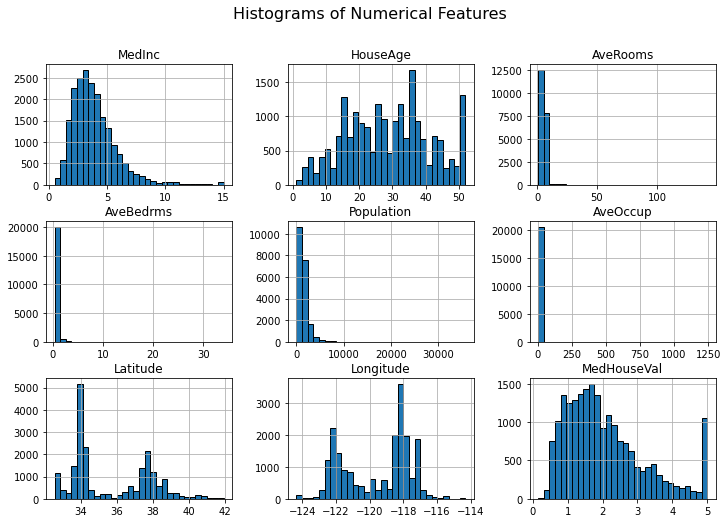

In [10]:
plt.figure(figsize=(12,8))
df.hist(bins=30,figsize=(12,8),edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

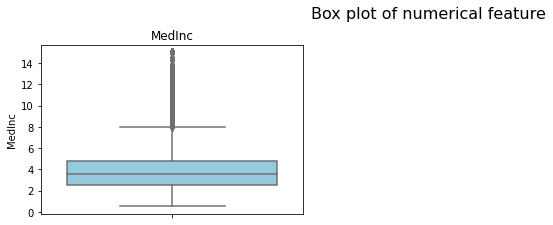

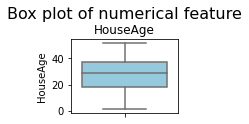

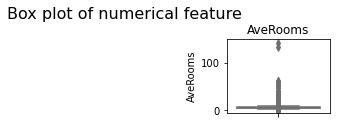

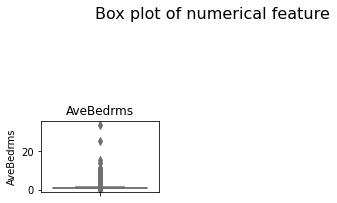

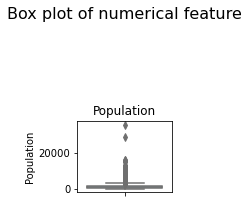

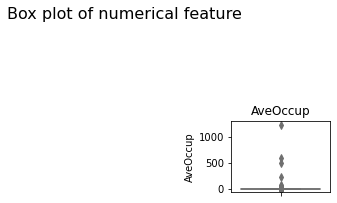

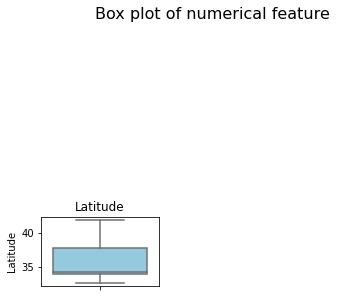

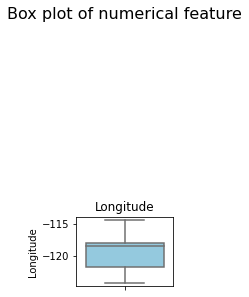

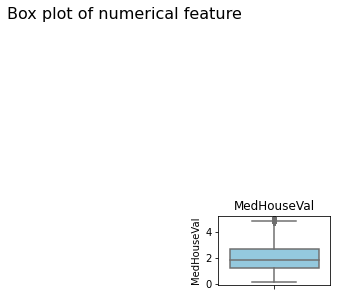

In [12]:
plt.figure(figsize=(12,8))
for i,column in enumerate(df.columns,1):
    plt.subplot(3,3,i)
    sns.boxplot(y=df[column],color='skyblue')
    plt.title(column)
    plt.tight_layout()
    plt.suptitle("Box plot of numerical feature",fontsize=16,y=1.02)
    plt.show()

In [29]:
# Function to identify outliers using IQR
def identify_outliers(df):
 outliers = {}

 for column in df.columns:
   Q1 = df[column].quantile(0.25)
   Q3 = df[column].quantile(0.75)
   IQR = Q3 - Q1

   lower_bound = Q1 - 1.5 * IQR
   upper_bound = Q3 + 1.5 * IQR

   outliers[column]=df[(df[column]<lower_bound)|(df[column]>upper_bound)][column].count()
 return outliers

In [31]:
outliers = identify_outliers(df)
outlier_df = pd.DataFrame.from_dict(outliers,orient='index',columns=['outlier count'])
print("\nOutlier counts per Feature:")
print(outlier_df)


Outlier counts per Feature:
             outlier count
MedInc                 681
HouseAge                 0
AveRooms               511
AveBedrms             1424
Population            1196
AveOccup               711
Latitude                 0
Longitude                0
MedHouseVal           1071


In [32]:
# Call the outlier identification function and print the results
outliers = identify_outliers(df)
outlier_df = pd.DataFrame.from_dict(outliers, orient='index', columns=['Outlier Count'])
print("\nOutlier Counts per Feature:")
print(outlier_df)


Outlier Counts per Feature:
             Outlier Count
MedInc                 681
HouseAge                 0
AveRooms               511
AveBedrms             1424
Population            1196
AveOccup               711
Latitude                 0
Longitude                0
MedHouseVal           1071


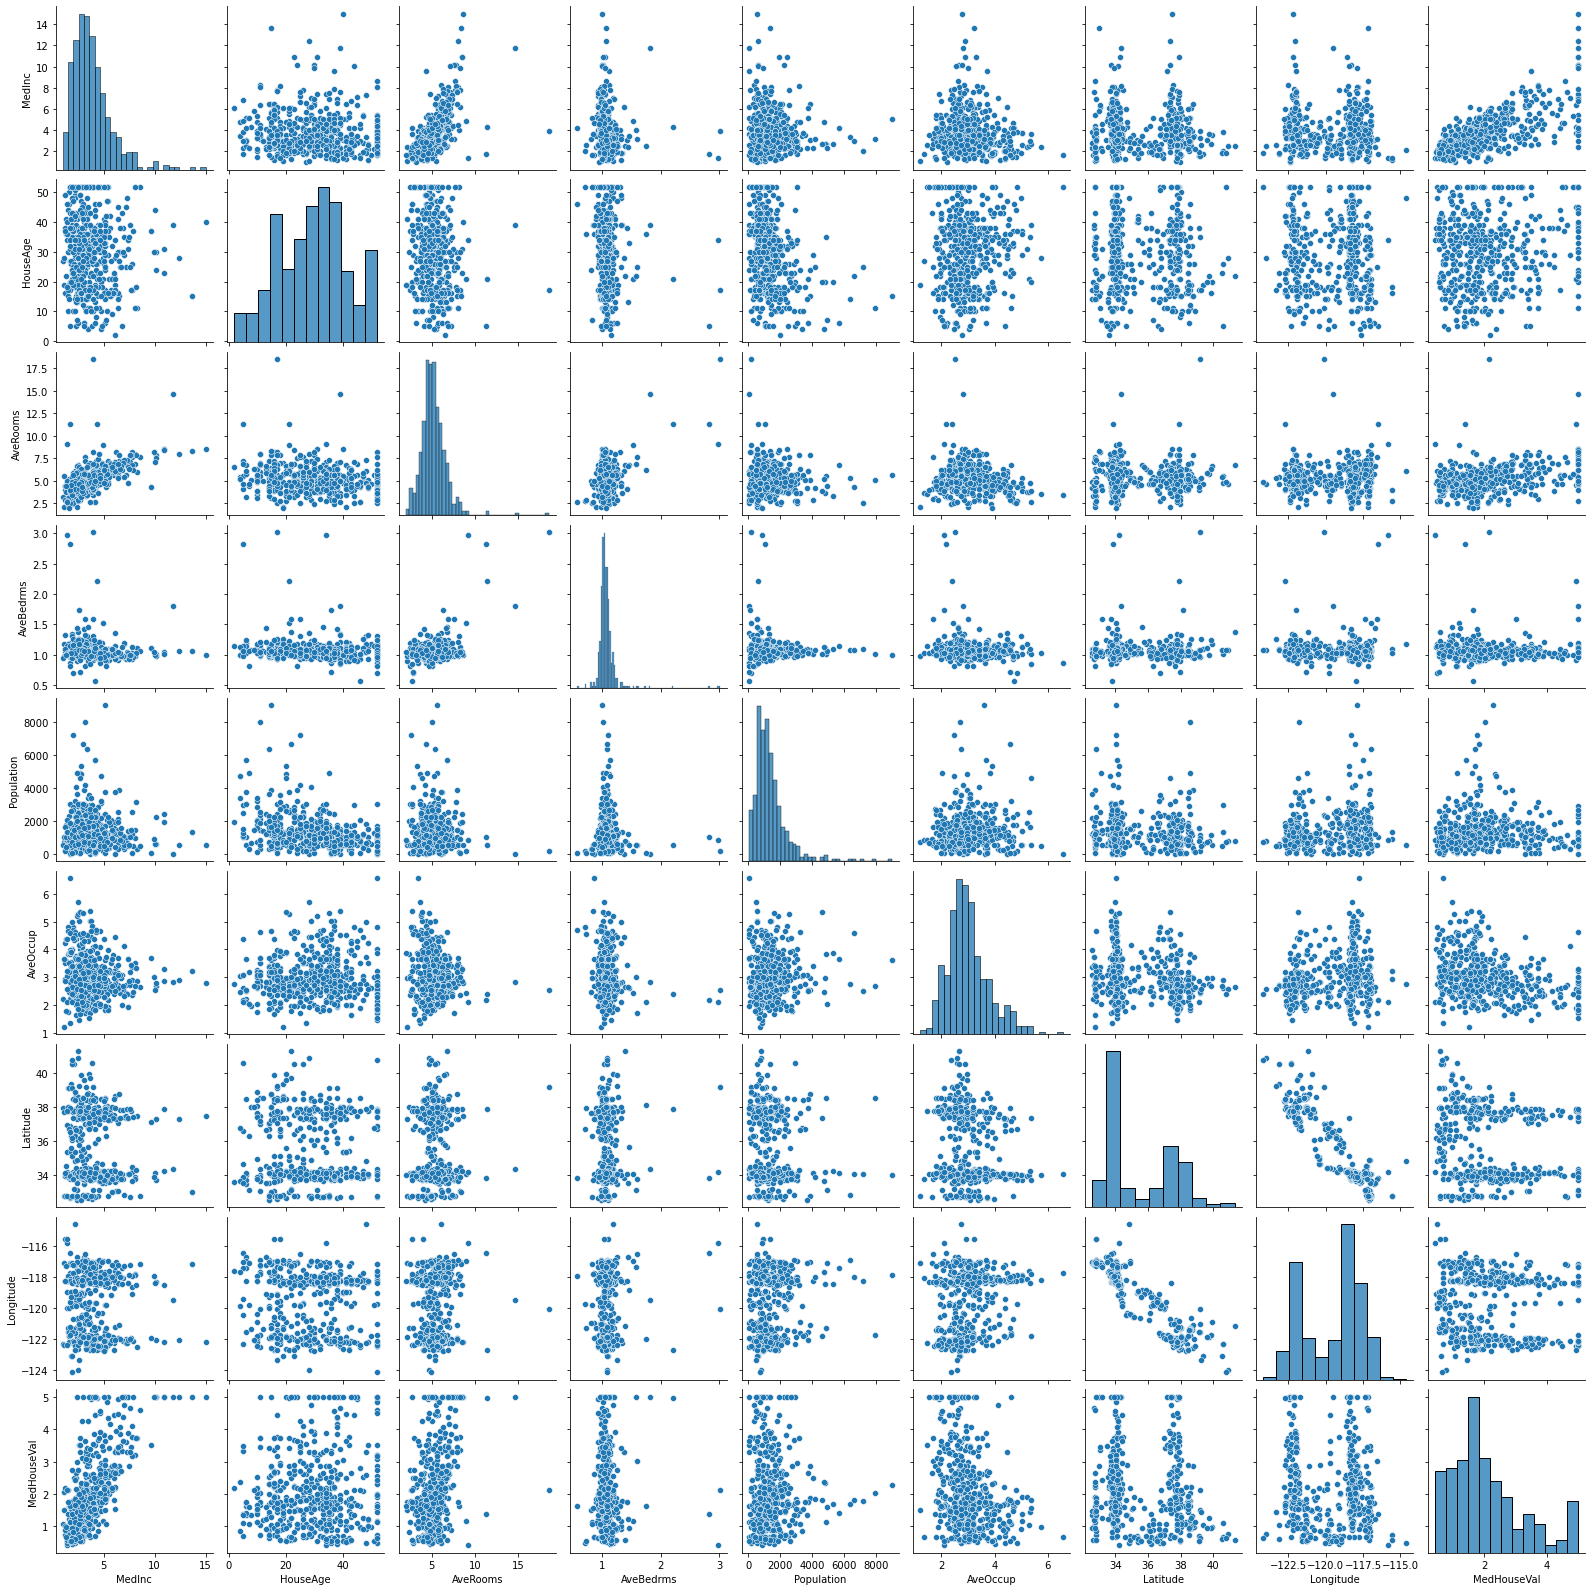

In [35]:
sns.pairplot(df.sample(500))
plt.show()